# Handling Missing Values

#### Why are there missing values 

1. They heritate to put down the information
2. Survey informations are not valid
3. people may have died

## What are the different types of missing data.

#### 1. Missing completely at random (MCAR)

A variable is missing completely at random. if the probability of being missing is same for all the observation.When data is MCAR , there is absolutly no relation between the data missing and other values observed or missing within the dataset, those missing data points are subset of data. 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 2 . Missing Data Not At Random ( MNAR)

There is absolutly some relationship between the data missing any other values observed or missing within the dataset

In [5]:
import numpy as np

In [6]:
df['cabin_nan']=np.where(df['Cabin'].isnull(),1,0)

In [7]:
df['cabin_nan'].mean()

0.7710437710437711

In [8]:
# Lets use group by to check the survived and cabin null values 

In [9]:
df.groupby(['Survived'])['cabin_nan'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_nan, dtype: float64

### Missing AT Random (MAR)

In [10]:
# Men- Hide their salary
# Women -- Hide thier Age

## All techniques of handling missing values 

1. Mean/Median/Mode Replacement 
2. Random Sample Imputation
3. Capturing Nan values with a new features
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent Categories imputation

### 1. Mean , Median and Mode imputation

##### When should we apply - 
Mean/median imputation has the assumption that the data are missing completely at random (MCAR)- we solve this by replacing the Nan with the most frequent occurance of the variable 

In [11]:
df1=pd.read_csv("titanic_train.csv",usecols=['Age','Fare','Survived'])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
# Lets check the percentage of missing values 
df1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
#lets create a function to remove the null values 

In [14]:
def median_nan(df1,variable,median):
    df1[variable+'_median']=df1[variable].fillna(median)

In [15]:
#lets check the median

In [16]:
median=df1['Age'].median()
median

28.0

In [17]:
median_nan(df1,'Age',median)
df1.head(6)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0


In [18]:
#lets check the std of both the features
print(df1['Age'].std())
print(df1['Age_median'].std())

14.526497332334044
13.019696550973194


In [19]:
#lets plot

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

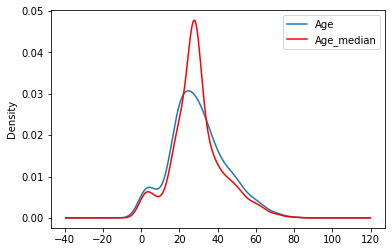

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)
df1['Age'].plot(kind='kde',ax=ax)
df1.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages and Disadvatages of mean median imputation

### Advantages 

1. Easy to implement and roboust to outliers 
2. Faster war to obtain the complete the dataset

### Disadvantages 

1. Change or Distortion in the original dataset
2. impacts the correlation

### 2. Random Sample Imputation

Random sample imputation consist of taking random observation from the dataset and we use this observation to raplace the nan values 

When it use : it assumes that when data are missing completely at random (MCAR)

In [22]:
import pandas as pd
df2=pd.read_csv("titanic_train.csv",usecols=['Age','Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
# lets check the null values 
df2.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
#lets check the mean 
df2.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [25]:
#lets take age null values 
df2['Age'].isnull().sum()

177

In [26]:
#lets remove the null values 

In [27]:
df2['Age'].dropna().sample(df2['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [28]:
df2[df2['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [29]:
#lets create a function

In [30]:
def impute_nan(df2,variable,median):
    df2[variable+'_median']=df2[variable].fillna(median)
    df2[variable+'_random']=df2[variable]
    
    ## it will have random sample to fill na
    random_sample=df2[variable].dropna().sample(df2[variable].isnull().sum(),random_state=0)
    
    ## Pandas needs to have indexes to merge the dataset
    random_sample.index=df2[df2[variable].isnull()].index
    df2.loc[df2[variable].isnull(),variable+'_random']=random_sample

In [31]:
median=df2.Age.median()
median

28.0

In [32]:
impute_nan(df2,'Age',median)

In [33]:
df2.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

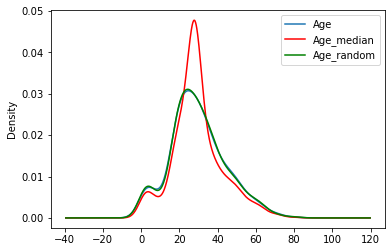

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111)
df2['Age'].plot(kind='kde',ax=ax)
df2.Age_median.plot(kind='kde',ax=ax,color='red')
df2.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantages 

1. Easy to implement
2. There is less distribution in variance

#### Disadvantages 

1. Every situation randomness wont work

### 3. Capturing Nan Values with new feature 

it works well if the data are not missing completely at random

In [36]:
df3=pd.read_csv("titanic_train.csv",usecols=['Age','Fare','Survived'])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [37]:
import numpy as np

In [38]:
df3['Age_Nan']=np.where(df3['Age'].isnull(),1,0)
df3.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [40]:
df3.Age.median()

28.0

In [41]:
# Now we will replace the median with null values present in Age 

In [42]:
df3['Age'].fillna(df3.Age.median(),inplace=True)

In [44]:
df3.head(10)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## Advantages and Disadvantages 

#### Advantages 
1. Easy to implement 
2. Capture importance of missing values 

#### Disadvantages 

1. Creating Additional Features(Curse of Diementionality)

### 4. End of Distribution Imputation

In [45]:
df4=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df4.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [46]:
#lets plot the Age feature 

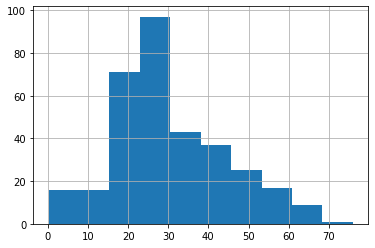

In [47]:
df4.Age.hist(bins=10)

In [49]:
#lets check the mean of std
extreme=df4.Age.mean()+3*df4.Age.std()
extreme

72.81621806831905

In [50]:
# Lets use the boxplot to check the outliers

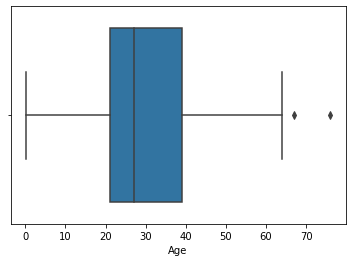

In [52]:
import seaborn as sns
sns.boxplot('Age',data=df4)

In [53]:
# lets create the function
def impute_nan(df4,variable,median,extreme):
    df4[variable+"_End_distribution"]=df4[variable].fillna(extreme)
    df4[variable].fillna(median,inplace=True)

In [54]:
impute_nan(df4,'Age',df4.Age.median(),extreme)

In [56]:
df4.head(10)

,Survived,Age,Fare,Age_End_distribution
0,0,34.5,7.8292,34.5
1,1,47.0,7.0000,47.0
2,0,62.0,9.6875,62.0
3,0,27.0,8.6625,27.0
4,1,22.0,12.2875,22.0
5,0,14.0,9.2250,14.0
6,1,30.0,7.6292,30.0
7,0,26.0,29.0000,26.0
8,1,18.0,7.2292,18.0
9,0,21.0,24.1500,21.0


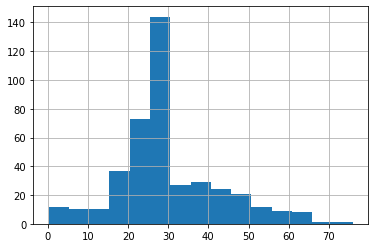

In [57]:
df4.Age.hist(bins=15)

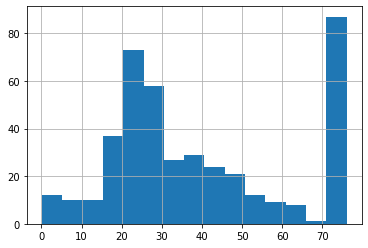

In [58]:
df4.Age_End_distribution.hist(bins=15)

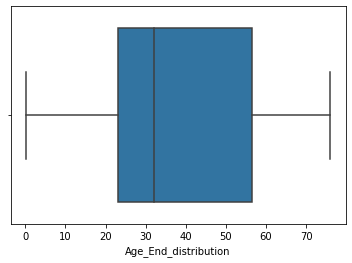

In [59]:
#lets plot the boxplot 
sns.boxplot('Age_End_distribution',data=df4)

### Aribitrary Value Imputation

This technique was derived from kaggle competetion it consist of replacing NAN by an aribtrary value

In [62]:
import pandas as pd
df5=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df5.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [63]:
# Lets create the function to remove nan values 
def impute_null(df5,variable):
    df5[variable+"_zeros"]=df5[variable].fillna(0)
    df5[variable+"_hundred"]=df5[variable].fillna(100)

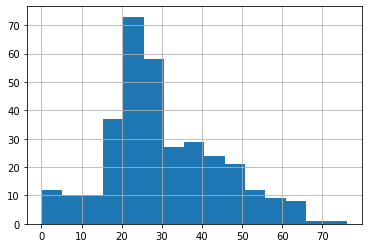

In [64]:
df5.Age.hist(bins=15)

In [65]:
impute_null(df5,'Age')

In [66]:
df5.head()

,Survived,Age,Fare,Age_zeros,Age_hundred
0,0,34.5,7.8292,34.5,34.5
1,1,47.0,7.0000,47.0,47.0
2,0,62.0,9.6875,62.0,62.0
3,0,27.0,8.6625,27.0,27.0
4,1,22.0,12.2875,22.0,22.0


### Advantages
1. Easy to Implement 
2. Capture the importance of missingness if there is one

### Disadvantegs
1. Distorts the original distribution of variable
2. if missingness is not important, it may mask the predictive power of the original variable by distorting its      distribution
3. Hard to decide which value to use 